# Step 1: Setup and Initialization


### 1.1  Importing necessary libraries for data handling and visualization


In [1]:

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Setting up our environment
pd.set_option('display.max_columns', None)   
pd.set_option('display.precision', 2) 

# Initializing NLTK resources
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nithinreddytummala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nithinreddytummala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1.2  Loading the datasets and checking the data shape


In [2]:
pp_recipes = pd.read_csv('PP_recipes.csv')
pp_users = pd.read_csv('PP_users.csv')
raw_interactions = pd.read_csv('RAW_interactions.csv')
raw_recipes = pd.read_csv('RAW_recipes.csv')
ingr_map = pd.read_pickle('ingr_map.pkl')
interactions_test = pd.read_csv('interactions_test.csv')
interactions_train = pd.read_csv('interactions_train.csv')
interactions_validation = pd.read_csv('interactions_validation.csv')

# Initial check of data shape
print(f"PP Recipes Data Shape: {pp_recipes.shape}")
print(f"PP Users Data Shape: {pp_users.shape}")
print(f"RAW Interactions Data Shape: {raw_interactions.shape}")
print(f"RAW Recipes Data Shape: {raw_recipes.shape}")
print(f"Interactions Test Data Shape: {interactions_test.shape}")
print(f"Interactions Train Data Shape: {interactions_train.shape}")
print(f"Interactions Validation Data Shape: {interactions_validation.shape}")

# Checking the first few rows of one of the datasets
print(pp_recipes.head())

PP Recipes Data Shape: (178265, 8)
PP Users Data Shape: (25076, 6)
RAW Interactions Data Shape: (1132367, 5)
RAW Recipes Data Shape: (231637, 12)
Interactions Test Data Shape: (12455, 6)
Interactions Train Data Shape: (698901, 6)
Interactions Validation Data Shape: (7023, 6)
       id       i                                        name_tokens  \
0  424415      23  [40480, 37229, 2911, 1019, 249, 6878, 6878, 28...   
1  146223   96900       [40480, 18376, 7056, 246, 1531, 2032, 40481]   
2  312329  120056     [40480, 21044, 16954, 8294, 556, 10837, 40481]   
3   74301  168258                       [40480, 10025, 31156, 40481]   
4   76272  109030  [40480, 17841, 252, 782, 2373, 1641, 2373, 252...   

                                   ingredient_tokens  \
0  [[2911, 1019, 249, 6878], [1353], [6953], [153...   
1  [[17918], [25916], [2507, 6444], [8467, 1179],...   
2  [[5867, 24176], [1353], [6953], [1301, 11332],...   
3  [[1270, 1645, 28447], [21601], [27952, 29471, ...   
4  [[1430, 

# 2. Initial Data Analysis

### 2.1 Dataset Overview

In [3]:
def dataset_overview(data, dataset_name):
    print(f"{'='*40}")
    print(f"{dataset_name} Dataset Overview:")
    print(f"{'='*40}")
    print(data.info())
    print("\nFirst five rows:")
    print(data.head())
    print("\nLast five rows:")
    print(data.tail())
    print("\n")

In [4]:
# Running the overview function for each dataset
dataset_overview(pp_recipes, 'PP Recipes')
dataset_overview(pp_users, 'PP Users')
dataset_overview(raw_interactions, 'RAW Interactions')
dataset_overview(raw_recipes, 'RAW Recipes')

PP Recipes Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178265 entries, 0 to 178264
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 178265 non-null  int64 
 1   i                  178265 non-null  int64 
 2   name_tokens        178265 non-null  object
 3   ingredient_tokens  178265 non-null  object
 4   steps_tokens       178265 non-null  object
 5   techniques         178265 non-null  object
 6   calorie_level      178265 non-null  int64 
 7   ingredient_ids     178265 non-null  object
dtypes: int64(3), object(5)
memory usage: 10.9+ MB
None

First five rows:
       id       i                                        name_tokens  \
0  424415      23  [40480, 37229, 2911, 1019, 249, 6878, 6878, 28...   
1  146223   96900       [40480, 18376, 7056, 246, 1531, 2032, 40481]   
2  312329  120056     [40480, 21044, 16954, 8294, 556, 10837, 40481]   
3   74301  168258  

In [5]:
# dataset_overview(ingr_map, 'Ingredient Map')
dataset_overview(interactions_test, 'Interactions Test')
dataset_overview(interactions_train, 'Interactions Train')
dataset_overview(interactions_validation, 'Interactions Validation')

Interactions Test Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12455 entries, 0 to 12454
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    12455 non-null  int64  
 1   recipe_id  12455 non-null  int64  
 2   date       12455 non-null  object 
 3   rating     12455 non-null  float64
 4   u          12455 non-null  int64  
 5   i          12455 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 584.0+ KB
None

First five rows:
   user_id  recipe_id        date  rating   u       i
0     8937      44551  2005-12-23     4.0   2  173538
1    56680     126118  2006-10-07     4.0  16  177847
2   349752     219596  2008-04-12     0.0  26   89896
3   628951      82783  2007-11-13     2.0  45  172637
4    92816     435013  2013-07-31     3.0  52  177935

Last five rows:
       user_id  recipe_id        date  rating      u       i
12450   101053     179011  2009-01-03     5.0  

### 2.2 Summary statistics

In [6]:
def summary_statistics(data, dataset_name):
    print(f"Summary Statistics for {dataset_name} Dataset:")
    if isinstance(data, pd.DataFrame):  # Check if the object is a DataFrame
        print(data.describe(include='all'))  # Change to 'number' if you only want numerical columns
    else:
        print(f"{dataset_name} does not appear to be a DataFrame.")
    print("\n")

In [7]:
# Running the summary statistics function for each dataset
summary_statistics(pp_recipes, 'PP Recipes')
summary_statistics(pp_users, 'PP Users')
summary_statistics(raw_interactions, 'RAW Interactions')
summary_statistics(raw_recipes, 'RAW Recipes')


Summary Statistics for PP Recipes Dataset:
               id          i                        name_tokens  \
count   178265.00  178265.00                             178265   
unique        NaN        NaN                             176694   
top           NaN        NaN  [40480, 32043, 6821, 8294, 40481]   
freq          NaN        NaN                                  5   
mean    213461.80   89132.00                                NaN   
std     138266.71   51460.82                                NaN   
min         38.00       0.00                                NaN   
25%      94576.00   44566.00                                NaN   
50%     196312.00   89132.00                                NaN   
75%     320562.00  133698.00                                NaN   
max     537716.00  178264.00                                NaN   

                                        ingredient_tokens  \
count                                              178265   
unique                        

In [8]:
# summary_statistics(ingr_map, 'Ingredient Map')
summary_statistics(interactions_test, 'Interactions Test')
summary_statistics(interactions_train, 'Interactions Train')
summary_statistics(interactions_validation, 'Interactions Validation')

Summary Statistics for Interactions Test Dataset:
         user_id  recipe_id        date    rating         u          i
count   1.25e+04   12455.00       12455  12455.00  12455.00   12455.00
unique       NaN        NaN        4184       NaN       NaN        NaN
top          NaN        NaN  2008-03-24       NaN       NaN        NaN
freq         NaN        NaN          16       NaN       NaN        NaN
mean    2.91e+07  209323.12         NaN      4.21  12288.50  115488.12
std     2.33e+08  135001.83         NaN      1.34   6897.75   50448.66
min     1.53e+03     120.00         NaN      0.00      2.00     102.00
25%     1.70e+05   94616.00         NaN      4.00   6428.50   76904.00
50%     3.83e+05  195040.00         NaN      5.00  12023.00  127793.00
75%     8.02e+05  314928.50         NaN      5.00  17985.50  160024.00
max     2.00e+09  537716.00         NaN      5.00  25074.00  178264.00


Summary Statistics for Interactions Train Dataset:
         user_id  recipe_id        date     r

# 3. Data Cleaning

### 3.1. Handling missing values, and removing duplicates for each dataset

Cleaning PP_recipes.csv:


In [11]:
# Removing duplicates
pp_recipes.drop_duplicates(subset='id', inplace=True)

# Checking for any missing values
print(pp_recipes.isnull().sum())

# Assuming 'ingredient_ids' should have valid entries, remove rows with missing 'ingredient_ids'
pp_recipes.dropna(subset=['ingredient_ids'], inplace=True)



id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64


PP_users.csv


In [12]:
# Removing duplicates
pp_users.drop_duplicates(subset='u', inplace=True)

# Checking and handle missing values
print(pp_users.isnull().sum())
# Handling missing values will depend on the columns. Assuming 'techniques' is important:
# pp_users.dropna(subset=['techniques'], inplace=True)


u             0
techniques    0
items         0
n_items       0
ratings       0
n_ratings     0
dtype: int64


RAW_interactions.csv


In [13]:
# Removig duplicates
raw_interactions.drop_duplicates(inplace=True)

# Checking for any missing values
print(raw_interactions.isnull().sum())

# Assuming 'user_id' and 'recipe_id' must be present, remove rows where they are missing
raw_interactions.dropna(subset=['user_id', 'recipe_id'], inplace=True)


user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


ingr_map.pkl


In [19]:
# Assuming 'ingr_map' is a DataFrame after loading from pickle
# Remove duplicates
ingr_map.drop_duplicates(subset='id', inplace=True)

# Checking for any missing values
print(ingr_map.isnull().sum())

# Handle missing values if any based on column importance


raw_ingr     0
raw_words    0
processed    0
len_proc     0
replaced     0
count        0
id           0
dtype: int64


interactions_test/train/validation.csv


In [20]:
# Remove duplicates
interactions_test.drop_duplicates(subset=['user_id', 'recipe_id'], inplace=True)

# Check for any missing values
print(interactions_test.isnull().sum())



user_id      0
recipe_id    0
date         0
rating       0
u            0
i            0
dtype: int64


Cleaning interactions_validation.csv


In [22]:
# Remove duplicates from interactions_validation
interactions_validation.drop_duplicates(subset=['user_id', 'recipe_id'], inplace=True)

# Check for any missing values in interactions_validation
print(interactions_validation.isnull().sum())

# Assuming that any row with missing 'user_id' or 'recipe_id' should be removed
interactions_validation.dropna(subset=['user_id', 'recipe_id'], inplace=True)



user_id      0
recipe_id    0
date         0
rating       0
u            0
i            0
dtype: int64


### 3.2 Additional data cleaning 

#### 1.PP_recipes.csv & RAW_recipes.csv:



In [95]:
import pandas as pd

# step 1 : Load the data
pp_recipes = pd.read_csv('PP_recipes.csv')
raw_recipes = pd.read_csv('RAW_recipes.csv')

# Step 2: Missing Values

# For pp_recipes, we'll remove rows with missing 'id' or 'ingredient_ids'
pp_recipes.dropna(subset=['id', 'ingredient_ids'], inplace=True)

# For raw_recipes, we can fill missing 'name' with 'Unknown'
raw_recipes['name'].fillna('Unknown', inplace=True)
raw_recipes['tags'].fillna('Unknown', inplace=True) 

# Step 3: Duplicates

# Remove duplicates based on 'id' in both DataFrames
pp_recipes.drop_duplicates(subset=['id'], inplace=True)
raw_recipes.drop_duplicates(subset=['id'], inplace=True)

# Step 4: Consistency

if isinstance(pp_recipes['ingredient_ids'].iloc[0], str):
    import ast
    pp_recipes['ingredient_ids'] = pp_recipes['ingredient_ids'].apply(ast.literal_eval)

# Step 5: Normalization

# Normalize 'name' in raw_recipes and assume 'ingredients' needs normalization
raw_recipes['name'] = raw_recipes['name'].apply(lambda x: ' '.join(x.lower().split()))

# Assuming that 'ingredients' in raw_recipes is a list of strings
raw_recipes['ingredients'] = raw_recipes['ingredients'].apply(lambda x: [' '.join(ing.lower().split()) for ing in x])

# Step 6: Data Types

# Check the data types
print(pp_recipes.dtypes)
print(raw_recipes.dtypes)

# Ensure 'id' is an integer
pp_recipes['id'] = pp_recipes['id'].astype(int)
raw_recipes['id'] = raw_recipes['id'].astype(int)

# Save the cleaned data
pp_recipes.to_csv('PP_recipes_cleaned.csv', index=False)
raw_recipes.to_csv('RAW_recipes_cleaned.csv', index=False)


id                    int64
i                     int64
name_tokens          object
ingredient_tokens    object
steps_tokens         object
techniques           object
calorie_level         int64
ingredient_ids       object
dtype: object
name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object


#### 2. PP_users

In [104]:
import pandas as pd

# Load the dataset
pp_users = pd.read_csv('PP_users.csv')

# Step 1: Missing Values
# Check for missing values in the User_ID column (assuming it's named 'u')
print(pp_users['u'].isnull().sum())

pp_users = pp_users.dropna(subset=['u'])

# Step 2: Duplicates
# Remove duplicate users based on User_ID
pp_users = pp_users.drop_duplicates(subset=['u'])

# Step 3: Data Integrity
# Load the RAW_interactions dataset
raw_interactions = pd.read_csv('RAW_interactions.csv')


user_id_mismatch = ~raw_interactions['user_id'].isin(pp_users['u'])

# Report any mismatches
if user_id_mismatch.any():
    print(f"There are {user_id_mismatch.sum()} user IDs in RAW_interactions that are not in PP_users.")

# Save the cleaned data
pp_users.to_csv('PP_users_cleaned.csv', index=False)


0
There are 1094121 user IDs in RAW_interactions that are not in PP_users.


#### 3.RAW_interactions.csv, interactions_test.csv, interactions_train.csv, interactions_validation.csv:



In [105]:
import pandas as pd

# Load the datasets
raw_interactions = pd.read_csv('RAW_interactions.csv')
interactions_test = pd.read_csv('interactions_test.csv')
interactions_train = pd.read_csv('interactions_train.csv')
interactions_validation = pd.read_csv('interactions_validation.csv')
pp_users = pd.read_csv('PP_users.csv')
pp_recipes = pd.read_csv('PP_recipes.csv')

# Function to clean and check interactions data
def clean_and_check_interactions(df, user_df, recipe_df, df_name="interactions"):
    # Check for missing values in the crucial columns
    missing_values = df[['user_id', 'recipe_id', 'rating']].isnull().sum()
    print(f"Missing values in {df_name}:")
    print(missing_values)
    
    # Assuming we want to remove entries with missing user_id or recipe_id
    df = df.dropna(subset=['user_id', 'recipe_id'])
    
    # For ratings, you might want to fill with median or just drop since it's your target variable
    # Here we drop missing ratings
    df = df.dropna(subset=['rating'])

    df = df[(df['rating'] >= 1) & (df['rating'] <= 5)]
    
    # Remove duplicate interactions
    df = df.drop_duplicates(subset=['user_id', 'recipe_id'])

    # Ensure consistency with user and recipe files
    df = df[df['user_id'].isin(user_df['u'])]
    df = df[df['recipe_id'].isin(recipe_df['id'])]

    print(f"{df_name} cleaned. Shape: {df.shape}")
    return df

# Clean and check each interactions dataframe
raw_interactions_cleaned = clean_and_check_interactions(raw_interactions, pp_users, pp_recipes, "RAW_interactions")
interactions_test_cleaned = clean_and_check_interactions(interactions_test, pp_users, pp_recipes, "interactions_test")
interactions_train_cleaned = clean_and_check_interactions(interactions_train, pp_users, pp_recipes, "interactions_train")
interactions_validation_cleaned = clean_and_check_interactions(interactions_validation, pp_users, pp_recipes, "interactions_validation")

# Check for data leakage between train, validation, and test sets
def check_data_leakage(train, test, validation, column):
    train_unique = set(train[column])
    test_unique = set(test[column])
    validation_unique = set(validation[column])
    
    test_leakage = len(test_unique.intersection(train_unique))
    validation_leakage = len(validation_unique.intersection(train_unique))
    
    print(f"Data leakage: {test_leakage} users in both train and test sets.")
    print(f"Data leakage: {validation_leakage} users in both train and validation sets.")

check_data_leakage(interactions_train_cleaned, interactions_test_cleaned, interactions_validation_cleaned, 'user_id')

# Save the cleaned data
raw_interactions_cleaned.to_csv('RAW_interactions_cleaned.csv', index=False)
interactions_test_cleaned.to_csv('interactions_test_cleaned.csv', index=False)
interactions_train_cleaned.to_csv('interactions_train_cleaned.csv', index=False)
interactions_validation_cleaned.to_csv('interactions_validation_cleaned.csv', index=False)


Missing values in RAW_interactions:
user_id      0
recipe_id    0
rating       0
dtype: int64
RAW_interactions cleaned. Shape: (32125, 5)
Missing values in interactions_test:
user_id      0
recipe_id    0
rating       0
dtype: int64
interactions_test cleaned. Shape: (273, 6)
Missing values in interactions_train:
user_id      0
recipe_id    0
rating       0
dtype: int64
interactions_train cleaned. Shape: (29688, 6)
Missing values in interactions_validation:
user_id      0
recipe_id    0
rating       0
dtype: int64
interactions_validation cleaned. Shape: (154, 6)
Data leakage: 273 users in both train and test sets.
Data leakage: 154 users in both train and validation sets.


# 4. Visualization

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import pickle


In [135]:
pp_recipes = pd.read_csv('PP_recipes.csv')
raw_recipes = pd.read_csv('RAW_recipes.csv')


In [136]:
# Get descriptive statistics for PP_recipes
pp_recipes.describe()

# Get descriptive statistics for RAW_recipes
raw_recipes.describe()


,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.00,2.32e+05,2.32e+05,231637.00,231637.00
mean,222014.71,9.40e+03,5.53e+06,9.77,9.05
std,141206.64,4.46e+06,9.98e+07,6.00,3.73
min,38.00,0.00e+00,2.70e+01,0.00,1.00
25%,99944.00,2.00e+01,5.69e+04,6.00,6.00
50%,207249.00,4.00e+01,1.74e+05,9.00,9.00
75%,333816.00,6.50e+01,3.98e+05,12.00,11.00
max,537716.00,2.15e+09,2.00e+09,145.00,43.00


### 4.1 Recipe Rating Analysis



In this section, we will merge the average recipe ratings from the `RAW_interactions.csv` dataset with our primary `RAW_recipes.csv` dataset. The `RAW_interactions.csv` file contains individual user interactions and ratings for the recipes. We will compute the average rating for each recipe and then perform a series of visualizations to understand the distribution of these ratings.

Our analysis will include:
- A histogram to visualize the distribution of average recipe ratings.
- Merging average ratings with the raw recipes to enhance our recipe dataset with user feedback.

This merged data will then be used for further exploratory data analysis and visualizations to derive insights into recipe preferences and complexities.



<Figure size 1000x600 with 0 Axes>

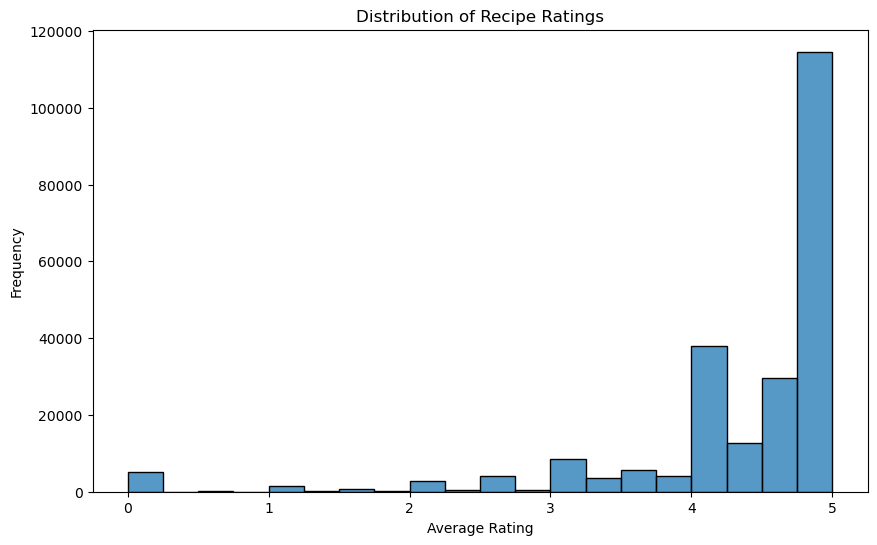

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
raw_recipes = pd.read_csv('RAW_recipes.csv')
raw_interactions = pd.read_csv('RAW_interactions.csv')

# Calculate the average rating per recipe in the interactions dataset
average_ratings = raw_interactions.groupby('recipe_id')['rating'].mean().reset_index()
average_ratings.columns = ['id', 'average_rating']

# Merge the average ratings with the raw recipes dataset
raw_recipes = pd.merge(raw_recipes, average_ratings, on='id', how='left')

# Now you can perform your visualizations with the average_rating column
# Distribution of Recipe Ratings
plt.figure(figsize=(10, 6))
sns.histplot(raw_recipes['average_rating'].dropna(), kde=False, bins=20)
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# The rest of the visualizations will remain the same
# Make sure to replace 'rating' with 'average_rating' for the Recipe Complexity vs Ratings plot
# ...



From the histogram above, we can observe the following:

- The distribution of recipe ratings is left-skewed, indicating that a majority of recipes have high ratings, with the most common rating being close to 5.
- There are relatively few recipes with low ratings (i.e., ratings near 0), suggesting that recipes in the dataset are generally well-received by the users.
- The concentration of high ratings may also indicate a tendency of users to rate only when they have a positive experience, or possibly a bias towards only submitting ratings for recipes they enjoyed.
- The prevalence of high ratings can be advantageous for a recommender system, as there is a significant amount of positive interaction data to draw from. However, it might also pose a challenge in distinguishing between the highly rated recipes since there is less variance in the ratings.




### 4.2 Top Ingredients


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

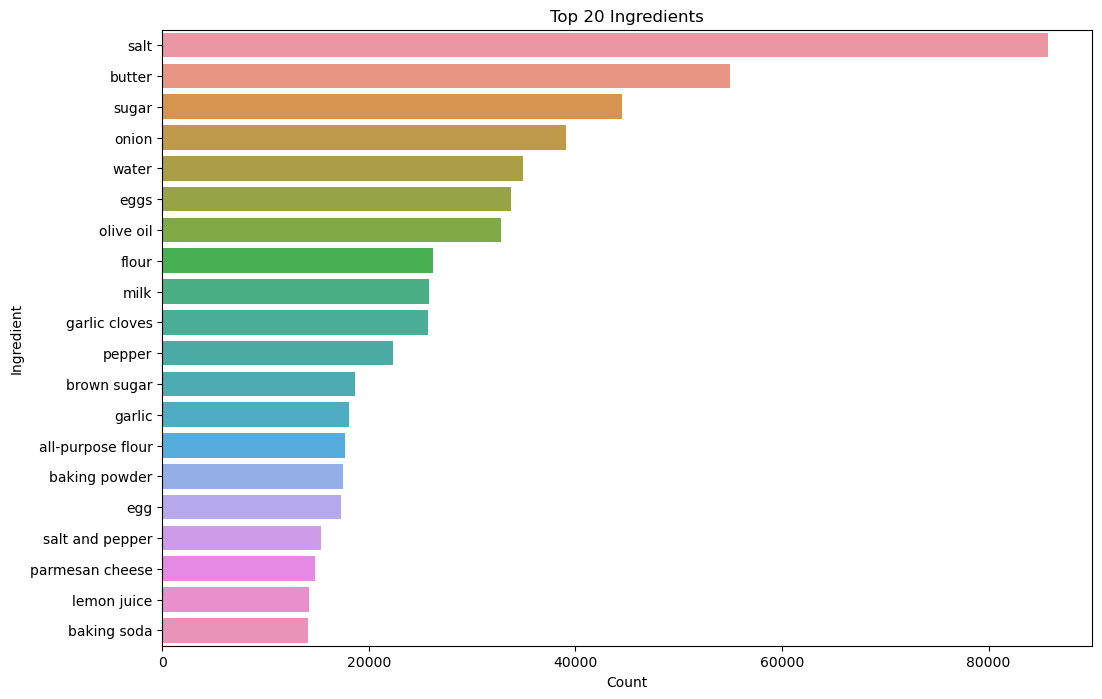

In [160]:
from ast import literal_eval
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the ingredients are in string form and convert them to lists if necessary
if isinstance(raw_recipes['ingredients'].iloc[0], str):
    raw_recipes['ingredients'] = raw_recipes['ingredients'].apply(literal_eval)

# Count the occurrence of each ingredient across all recipes
ingredient_counts = Counter([ingredient for sublist in raw_recipes['ingredients'] for ingredient in sublist])

# Select the top 20 ingredients
top_ingredients = ingredient_counts.most_common(20)

# Create a DataFrame for easy plotting
top_ingredients_df = pd.DataFrame(top_ingredients, columns=['Ingredient', 'Count'])

# Plot the top ingredients in a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Ingredient', data=top_ingredients_df)
plt.title('Top 20 Ingredients')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.show()


- Salt is the most commonly used ingredient, followed by butter and sugar.
- Basic baking ingredients like flour, eggs, and milk are very common, indicating a prevalence of baking recipes.
- Olive oil and garlic are the most common ingredients used in savory dishes.
- There is a significant drop in frequency from common ingredients like salt to less common ones like lemon juice and baking soda.


### 4.3. Recipe Complexity


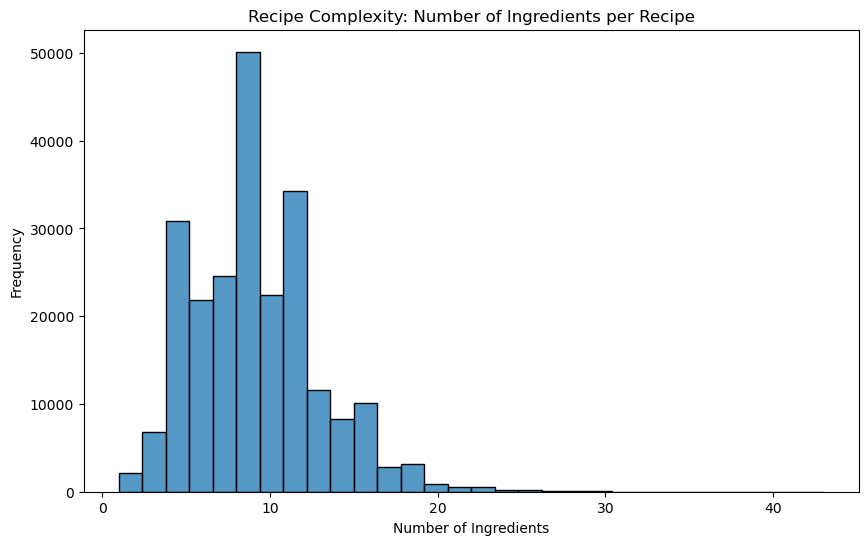

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(raw_recipes['n_ingredients'], bins=30, kde=False)
plt.title('Recipe Complexity: Number of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()


- The majority of recipes contain between 5 to 10 ingredients.
- There is a significant decrease in frequency as the number of ingredients increases, with very few recipes containing more than 20 ingredients.
- This distribution suggests that simpler recipes with fewer ingredients are more common or preferred.


In [162]:
# Display the first few entries in the 'tags' column
print(raw_recipes['tags'].head())


0    ['60-minutes-or-less', 'time-to-make', 'course...
1    ['30-minutes-or-less', 'time-to-make', 'course...
2    ['time-to-make', 'course', 'preparation', 'mai...
3    ['60-minutes-or-less', 'time-to-make', 'course...
4    ['weeknight', 'time-to-make', 'course', 'main-...
Name: tags, dtype: object


### 4.4.Dietary Labels


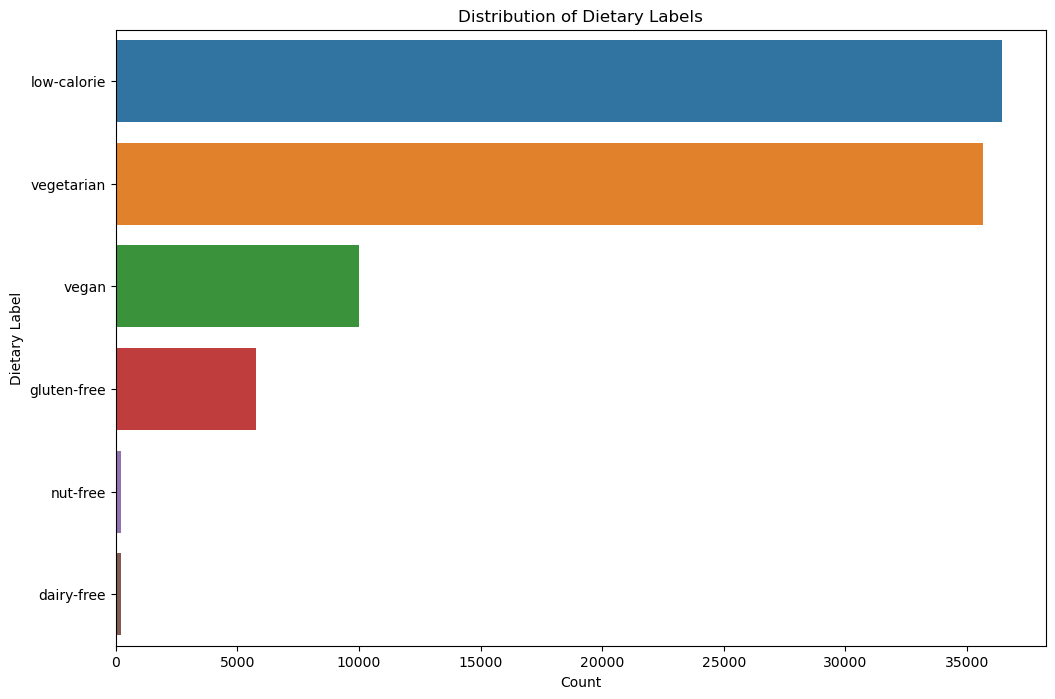

In [163]:
from ast import literal_eval
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Convert string representations of lists to actual lists
raw_recipes['tags'] = raw_recipes['tags'].apply(literal_eval)

# Flatten the list of tags and create a Counter object
all_tags = [tag for sublist in raw_recipes['tags'] for tag in sublist]
tags_counter = Counter(all_tags)

# Here's a broad list of potential dietary labels, 
dietary_keywords = ['vegetarian', 'vegan', 'gluten-free', 'dairy-free', 'nut-free', 'paleo', 'low-calorie', 'keto', 'whole30']

# Filter out the dietary labels
dietary_labels = {key: value for key, value in tags_counter.items() if any(diet_key in key for diet_key in dietary_keywords)}

# Create a DataFrame from the dietary labels counter for visualization
dietary_labels_df = pd.DataFrame(list(dietary_labels.items()), columns=['Dietary Label', 'Count'])

# Sort the DataFrame by 'Count' for better visualization
dietary_labels_df.sort_values('Count', ascending=False, inplace=True)

# Plotting the bar chart for dietary labels
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Dietary Label', data=dietary_labels_df)
plt.title('Distribution of Dietary Labels')
plt.xlabel('Count')
plt.ylabel('Dietary Label')
plt.show()


- Low-calorie recipes are the most frequent, followed by vegetarian recipes, indicating a possible trend or preference for healthier eating options.
- Vegan recipes are also quite common, which could suggest a significant vegan demographic or interest in vegan cooking.
- Gluten-free and nut-free recipes are less common, but still significant, suggesting awareness and accommodation for these dietary restrictions.
- Dairy-free recipes are the least common among the dietary labels presented.


# 5. Visualization Part 2

### 5.1 For PP_users.csv & RAW_interactions.csv


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
users_df = pd.read_csv('PP_users.csv')
interactions_df = pd.read_csv('RAW_interactions.csv')


#### 5.1.1 User Activity Analysis


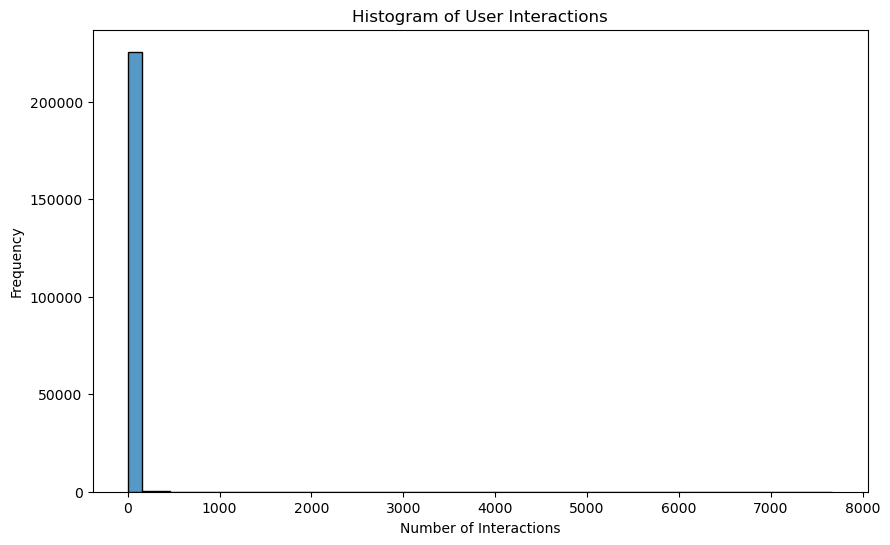

In [168]:
# Group the interactions by user and count them
user_activity_counts = interactions_df.groupby('user_id').size()

# Plot a histogram
plt.figure(figsize=(10, 6))
sns.histplot(user_activity_counts, bins=50, kde=False)
plt.title('Histogram of User Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()


- The vast majority of users have a very low number of interactions, close to 0, indicating a highly skewed distribution of interactions.
- There are very few users with a high number of interactions, as evidenced by the frequency dropping to near zero past the first bin of the histogram.
- This distribution suggests that most users are only minimally engaged.


#### 5.1.2 Rating Distribution


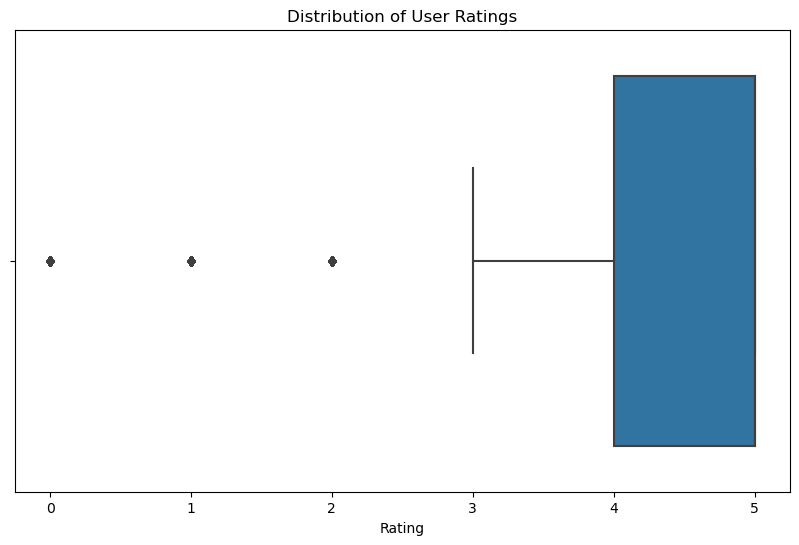

In [169]:
# Remove any interactions without a rating (if necessary)
interactions_df = interactions_df.dropna(subset=['rating'])

# Plot a boxplot for ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', data=interactions_df)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.show()


- A significant proportion of ratings are at the highest score, which is 5. This could indicate a tendency for users to rate only when they have a positive experience or are satisfied.
- Ratings 1 to 4 are much less frequent, with very few users giving these scores compared to the rating of 5.
- The data may suggest a possible issue with rating scale usage or could imply that the user base generally experiences positive outcomes with whatever is being rated.


#### 5.1.3 Temporal Trends


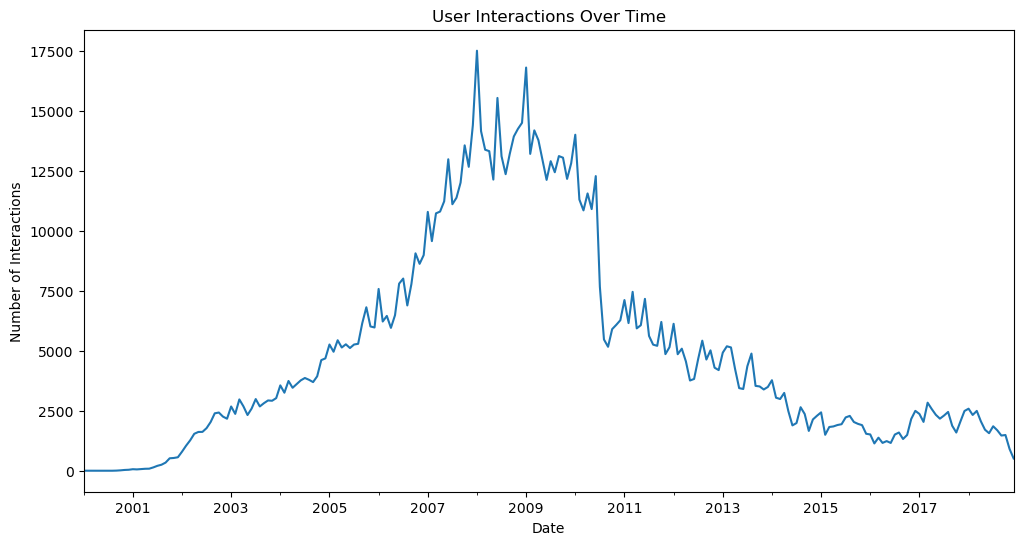

In [173]:
# Convert the date column to datetime
interactions_df['date'] = pd.to_datetime(interactions_df['date'])

# Counting the number of interactions per day/month/year
interactions_over_time = interactions_df.groupby(interactions_df['date'].dt.to_period('M')).size()

# Plot a time-series plot
plt.figure(figsize=(12, 6))
interactions_over_time.plot(title='User Interactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.show()


- User interactions have fluctuated over time with several peaks and troughs.
- There was a significant increase in interactions leading up to around 2009, after which a major peak is observed.
- After the 2009 peak, there is a general decline, with some variability, suggesting a decrease in user engagement over time or changes in the user base.
- The reasons behind the fluctuations would require further contextual information to understand the driving factors behind these patterns.


### 5.2 ingr_map.pkl

Loading the Data

In [ ]:
import pandas as pd
import pickle
import networkx as nx
import matplotlib.pyplot as plt

# Load the ingredient mapping data
with open('ingr_map.pkl', 'rb') as file:
    ingr_map = pickle.load(file)

# Load the raw recipe data
raw_recipes = pd.read_csv('RAW_recipes.csv')

# Load the processed recipe data
pp_recipes = pd.read_csv('PP_recipes.csv')

# Create a mapping from the raw ingredients to the processed ingredients using the correct column names
ingredient_mapping = ingr_map[['raw_ingr', 'processed']]
print(ingredient_mapping.head())

# Create a graph
G = nx.Graph()

# Add edges between raw and processed ingredients
for _, row in ingredient_mapping.iterrows():
    G.add_edge(row['raw_ingr'], row['processed'])

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='grey', font_size=8, alpha=0.6)
plt.title('Ingredient Mapping')
plt.show()

# Analyze ingredient variety
unique_raw_ingredients = set(raw_recipes['ingredients'].str.split(', ').explode())
unique_processed_ingredients = set(pp_recipes['ingredients'].str.split(', ').explode())

print(f"Total number of unique raw ingredients: {len(unique_raw_ingredients)}")
print(f"Total number of unique processed ingredients: {len(unique_processed_ingredients)}")

# Analyze common substitutions or reductions
substitutions = ingredient_mapping['processed'].value_counts()
print("\nMost common processed ingredients and their frequency:")
print(substitutions.head())

# To find reductions, we'll see if multiple raw ingredients are mapped to the same processed ingredient
reductions = ingredient_mapping.groupby('processed')['raw_ingr'].nunique()
common_reductions = reductions[reductions > 1]
print("\nCommon reductions in ingredients after processing:")
print(common_reductions)


                                            raw_ingr  \
0  medium heads bibb or red leaf lettuce, washed,...   
1              mixed baby lettuces and spring greens   
2                               romaine lettuce leaf   
3                               iceberg lettuce leaf   
4                                red romaine lettuce   

                                           processed  
0  medium heads bibb or red leaf lettuce, washed,...  
1               mixed baby lettuces and spring green  
2                               romaine lettuce leaf  
3                               iceberg lettuce leaf  
4                                red romaine lettuce  


In [2]:
import pandas as pd
import pickle

# Load the ingredient mapping pickle file
with open('ingr_map.pkl', 'rb') as file:
    ingr_map = pickle.load(file)

# Display the first few entries in the ingredient mapping to understand its structure
print(ingr_map.head())


                                            raw_ingr  raw_words  \
0  medium heads bibb or red leaf lettuce, washed,...         13   
1              mixed baby lettuces and spring greens          6   
2                               romaine lettuce leaf          3   
3                               iceberg lettuce leaf          3   
4                                red romaine lettuce          3   

                                           processed  len_proc replaced  \
0  medium heads bibb or red leaf lettuce, washed,...        73  lettuce   
1               mixed baby lettuces and spring green        36  lettuce   
2                               romaine lettuce leaf        20  lettuce   
3                               iceberg lettuce leaf        20  lettuce   
4                                red romaine lettuce        19  lettuce   

   count    id  
0   4507  4308  
1   4507  4308  
2   4507  4308  
3   4507  4308  
4   4507  4308  


In [3]:
# Load RAW_recipes.csv
raw_recipes = pd.read_csv('RAW_recipes.csv')

# Display the first few entries in the RAW recipes to understand its structure
print(raw_recipes.head())

# Load PP_recipes.csv
pp_recipes = pd.read_csv('PP_recipes.csv')

# Display the first few entries in the PP recipes to understand its structure
print(pp_recipes.head())


                                         name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [

In [4]:
# Create a dictionary to map ingredient IDs to their cleaned names
id_to_cleaned_name = pd.Series(ingr_map.replaced.values, index=ingr_map.id).to_dict()


In [5]:
# Translate ingredient IDs to cleaned names in PP_recipes
pp_recipes['cleaned_ingredients'] = pp_recipes['ingredient_ids'].apply(lambda x: [id_to_cleaned_name[int(i)] for i in x.strip('[]').split(', ') if i.isdigit()])


In [6]:
# Check the variety of ingredients before and after processing
raw_ingredient_list = [item for sublist in raw_recipes.ingredients.apply(eval) for item in sublist]
processed_ingredient_list = [item for sublist in pp_recipes.cleaned_ingredients for item in sublist]

raw_ingredient_unique = set(raw_ingredient_list)
processed_ingredient_unique = set(processed_ingredient_list)

# Variety comparison
print(f'Number of unique ingredients in RAW_recipes: {len(raw_ingredient_unique)}')
print(f'Number of unique ingredients in PP_recipes (processed): {len(processed_ingredient_unique)}')


Number of unique ingredients in RAW_recipes: 14942
Number of unique ingredients in PP_recipes (processed): 7993


In [7]:
# Find common replacements
replacement_counts = ingr_map['replaced'].value_counts()

# Display the most common replacements
print(replacement_counts.head())


dressing    163
sausage     154
chile        99
cake mix     85
cheddar      84
Name: replaced, dtype: int64


#### 5.2.1 Comparision of unique ingredients

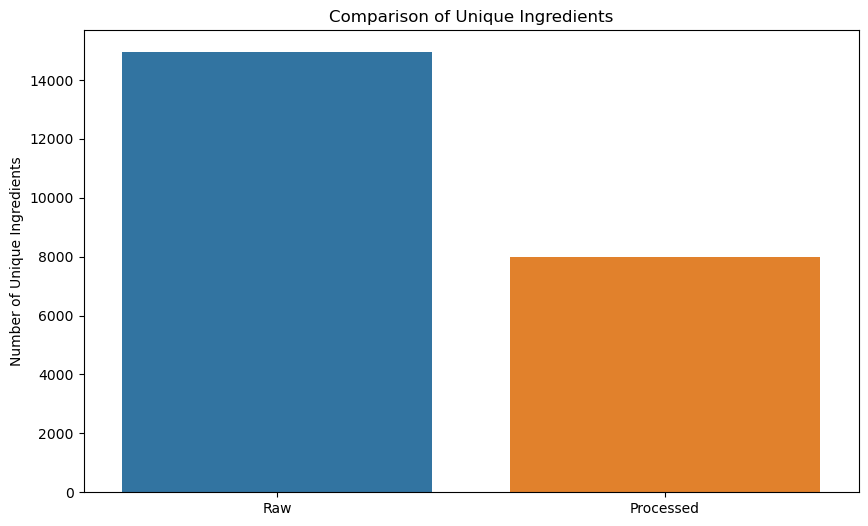

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'raw_ingredient_unique' and 'processed_ingredient_unique' are sets containing unique ingredients
# from the earlier analysis step

unique_counts = {
    'Raw': len(raw_ingredient_unique),
    'Processed': len(processed_ingredient_unique)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(unique_counts.keys()), y=list(unique_counts.values()))
plt.title('Comparison of Unique Ingredients')
plt.ylabel('Number of Unique Ingredients')
plt.show()


- The graph compares the number of unique ingredients between raw and processed categories.
- Raw ingredients significantly outnumber processed ones, with over 14,000 unique raw ingredients compared to around 8,000 processed ingredients.
- This suggests that there is a greater variety of raw ingredients used than processed ones, which could indicate a broader diversity in raw food items or possibly a tendency for processed foods to utilize a more limited set of common ingredients.


#### 5.2.2 Top Common Ingredient Replacements

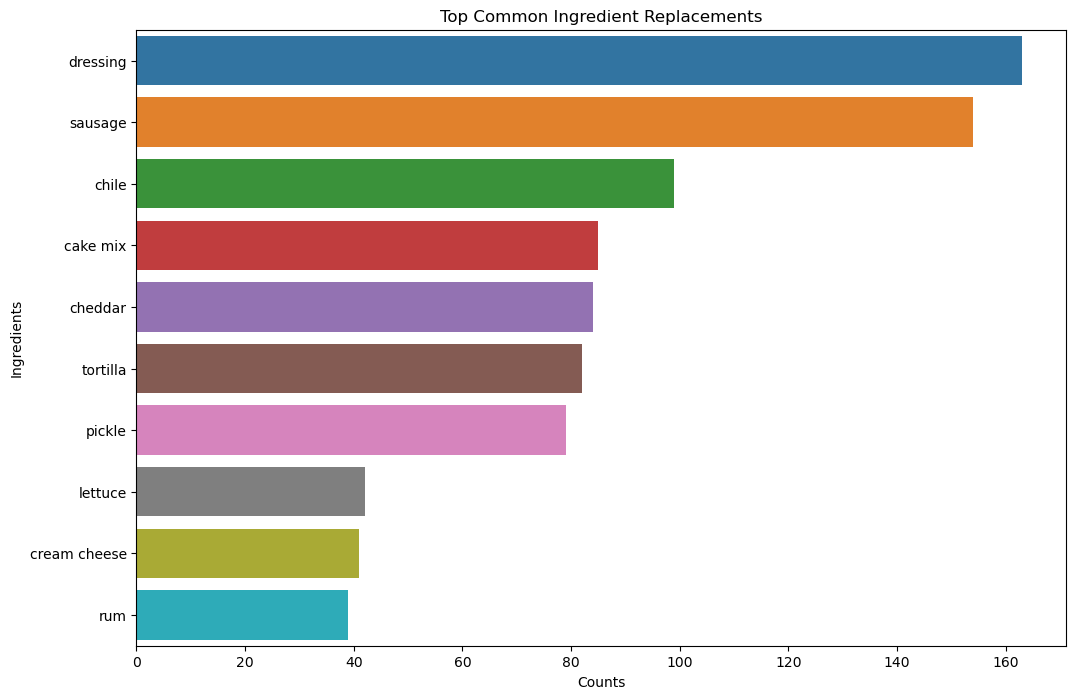

In [10]:
# Assuming 'replacement_counts' is a Series from the earlier analysis step
# which contains the counts of how many times each ingredient is replaced

top_replacements = replacement_counts.head(10)  # let's take top 10 for cleaner visualization

plt.figure(figsize=(12, 8))
sns.barplot(x=top_replacements.values, y=top_replacements.index)
plt.title('Top Common Ingredient Replacements')
plt.xlabel('Counts')
plt.ylabel('Ingredients')
plt.show()


- The second graph illustrates the top common ingredient replacements.
- The most replaced ingredient is dressing, followed by sausage, chile, cake mix, and cheddar.
- Each of these ingredients has a specific count of replacements, with dressing exceeding 160 occurrences.
- This graph might indicate the frequency of ingredient substitutions in recipes, which could reflect dietary preferences, availability, or trends in cooking.


#### 5.2.3 Comparision of Ingredient Description Lengths

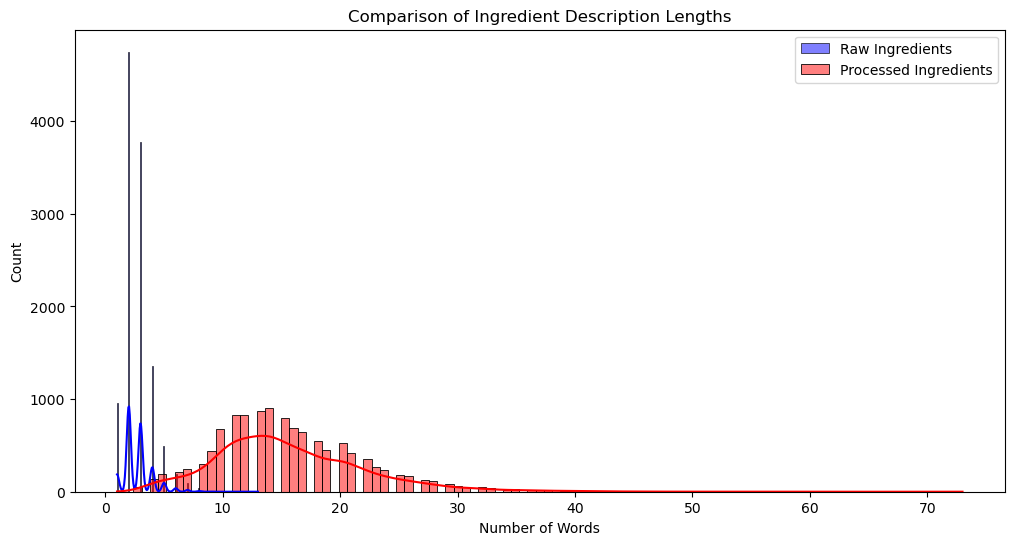

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(data=ingr_map, x='raw_words', color='blue', label='Raw Ingredients', kde=True)
sns.histplot(data=ingr_map, x='len_proc', color='red', label='Processed Ingredients', kde=True)
plt.title('Comparison of Ingredient Description Lengths')
plt.xlabel('Number of Words')
plt.legend()
plt.show()


- The third graph compares the length of ingredient descriptions between raw and processed ingredients.
- Raw ingredients tend to have descriptions that are shorter in word count, with a high frequency of descriptions that are only 1-2 words long.
- Processed ingredients have a more spread out distribution with a peak around 10 words, suggesting that processed ingredients often require longer descriptions, possibly due to more complex names or additional qualifiers (like brand names or preparation styles).
- The longer description lengths for processed ingredients might also reflect more detailed labeling requirements or more information provided to consumers about the contents or characteristics of processed items.


#### 5.2.4 Correlation Heatmap

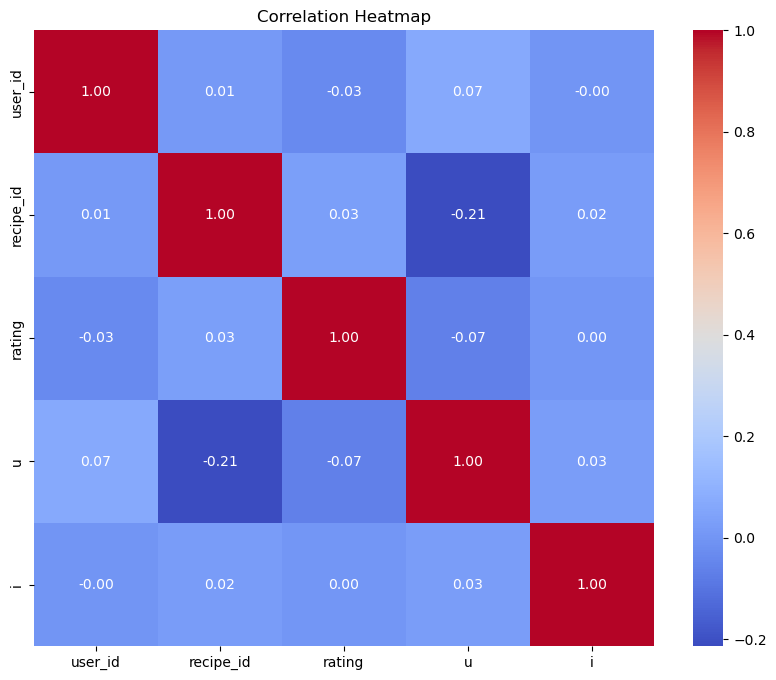

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Load datasets
interactions_train = pd.read_csv('interactions_train.csv')
interactions_test = pd.read_csv('interactions_test.csv')
interactions_validation = pd.read_csv('interactions_validation.csv')

# Combine datasets for analysis (if appropriate)
interactions_combined = pd.concat([interactions_train, interactions_test, interactions_validation])

# Calculate correlation matrix for the training data
corr_matrix = interactions_train.corr()

# Plot correlation heatmap for the training data
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Heatmap Correlation Analysis Summary

- **User ID and Recipe ID**: No significant correlation with ratings, suggesting IDs do not influence the ratings given or received.
- **Recipe ID and Rating**: Negligible positive correlation, indicating no meaningful relationship.
- **User ID and Rating**: Essentially no correlation, supporting the notion that user behavior in rating is not determined by their ID.
- **Additional Variables (`u` and `i`)**: High correlation with each other but not with other variables, possibly indicating redundancy or identical features.

**Overall**, the heatmap suggests that the variables displayed (primarily IDs) have little to no impact on the ratings, and that user and recipe IDs are not predictive of the ratings assigned. For more insightful analysis, additional descriptive data should be considered.


#### 5.2.5 Recipe Stats Correlation Heatmap

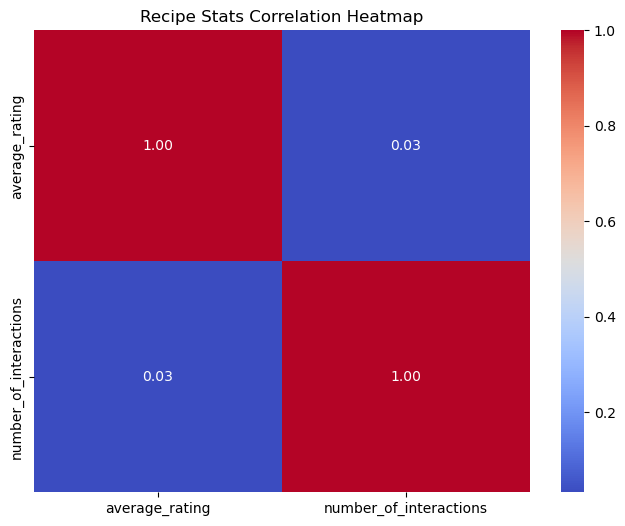

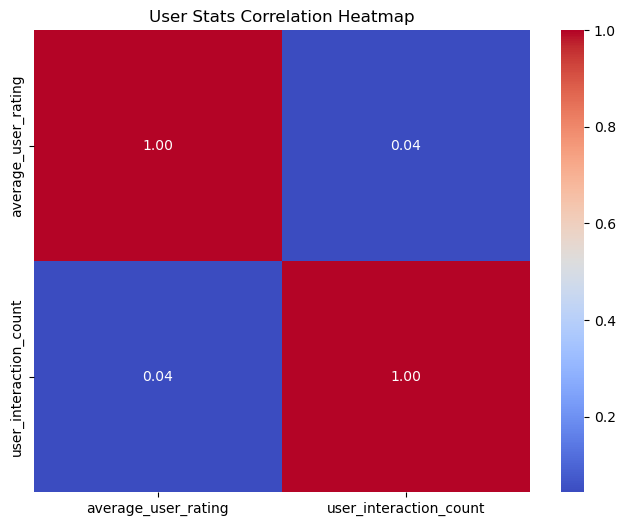

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
interactions_train = pd.read_csv('interactions_train.csv')
interactions_test = pd.read_csv('interactions_test.csv')
interactions_validation = pd.read_csv('interactions_validation.csv')

# Combine datasets for analysis (if appropriate)
interactions_combined = pd.concat([interactions_train, interactions_test, interactions_validation])

# Create a smaller dataframe with average recipe ratings and number of interactions
recipe_stats = interactions_combined.groupby('recipe_id').agg({
    'rating': ['mean', 'count']
})
recipe_stats.columns = ['average_rating', 'number_of_interactions']

# Create a smaller dataframe with average user ratings and user interaction count
user_stats = interactions_combined.groupby('user_id').agg({
    'rating': ['mean', 'count']
})
user_stats.columns = ['average_user_rating', 'user_interaction_count']

# Create a correlation matrix for recipes
recipe_corr = recipe_stats.corr()

# Create a correlation matrix for users
user_corr = user_stats.corr()

# Plot correlation heatmap for recipes
plt.figure(figsize=(8, 6))
sns.heatmap(recipe_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Recipe Stats Correlation Heatmap")
plt.show()

# Plot correlation heatmap for users
plt.figure(figsize=(8, 6))
sns.heatmap(user_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("User Stats Correlation Heatmap")
plt.show()


### Recipe Stats Correlation Analysis

- **Average Rating**: There is a perfect correlation of 1.00 with itself as expected.
- **Number of Interactions**: Also has a perfect correlation of 1.00 with itself, which is typical for any variable with itself.
- **Correlation between Average Rating and Number of Interactions**: A very weak positive correlation of 0.03 suggests that there is no substantial relationship between how often a recipe is interacted with and its average rating.

This heatmap indicates that within recipe statistics, the average rating a recipe receives is not influenced by the number of interactions (e.g., views or clicks) it has.

### User Stats Correlation Analysis

- **Average User Rating**: Exhibits a perfect self-correlation of 1.00.
- **User Interaction Count**: Also shows a perfect self-correlation of 1.00.
- **Correlation between Average User Rating and User Interaction Count**: With a correlation coefficient of 0.04, there is no meaningful correlation between the average rating a user gives and the number of interactions they have.

The user stats heatmap suggests that there is no significant relationship between the frequency of a user's interactions and the average rating they provide.


# 6. Conclusion

### Utilization of User Data for Effective Recipe Recommendations:

i)The user interaction histogram suggests that most users have relatively few interactions, indicating that there might be a large number of casual users. Tailoring recommendations to engage these users could be beneficial.

ii)The boxplot of user ratings shows a strong skew towards higher ratings, which implies user satisfaction with the recipes they choose to rate. This could mean that users are likely to try recipes with higher ratings, so these could be pushed more in the recommendations.

iii)The time series graph of user interactions over time can help in identifying patterns or trends in recipe popularity, which can inform time-sensitive recommendations (such as seasonal recipes).

### Identification of Efficient Machine Learning Models and Features:

i) The scatter plot and correlation matrices provide insight into the relationships between various numerical features. However, the scatter plot of number of steps versus preparation time does not show a clear pattern, suggesting that more complex models may be needed to capture the underlying relationships.

ii) The correlation heatmap of numerical features in RAW_recipes indicates no strong correlation between 'minutes', 'n_steps', and 'n_ingredients'. This might imply the need for non-linear models or feature engineering to better capture the interactions between these variables.
### Exploration of Underutilized Recipes and Factors Influencing User Preferences:

i)The bar charts showing the top common ingredient replacements and the top 20 ingredients provide insights into popular ingredients that can be used to suggest similar recipes to users with established preferences.

ii)The histograms comparing the number of unique ingredients and ingredient description lengths before and after processing suggest that simplifying ingredient lists could make recipes more accessible and appealing to users.

iii)The correlation heatmaps for recipe stats and user stats can guide the identification of features that are more likely to predict user engagement and satisfaction, such as the number of interactions and average user rating.